In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Project Name:** Amazon Prime TV Shows and Movies

**Summary:** This report presents an exploratory data analysis (EDA) of an Amazon Prime Video dataset containing information on movies and TV shows. The dataset comprises titles, covering release year. The primary objectives of this EDA are to understand the content distribution, genre preferences, rating trends, and regional variations on the platform. Key metrics analyzed include IMDb Score,TMDb Score release years, genres, production countries, and runtime. This analysis aims to provide insights into Amazon Prime Video's content strategy and audience preferences."

**Problem Statement:** Amazon Prime Video are constantly expanding the content libraries to diverse audience. Allows to extract valuable insights such as the genres and categories dominate the platform, How does content distribution vary different regioins, How the Content library evolved The highest rated or most popular shows on the platform

**GitHub:** https://github.com/GaneshTure

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

custom_colors = ["#FF5733", "#33FF57", "#3357FF", "#F0A500", "#A500F0", "#00F0A5", "#FF33A5", "#A5FF33", "#33A5FF"]
sns.set_style("whitegrid")
sns.set_palette(custom_colors)

import warnings
warnings.filterwarnings('ignore')

In [3]:
credits = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credits.csv')
titles = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titles.csv')

In [4]:
credits.shape

(124235, 5)

In [5]:
titles.shape

(9871, 15)

In [6]:
credits_grouped = credits.groupby('id').agg({
    'name': lambda x: ', '.join(x),  # Combine names
    'role': lambda x: ', '.join(set(x))  # Remove duplicate "actor" values
}).reset_index()
merged_df = pd.merge(titles, credits_grouped, on='id', how = 'left')
merged_df.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,"Joe Besser, Moe Howard, Larry Fine",ACTOR
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,"Buster Keaton, Marion Mack, Glen Cavender, Jim...","ACTOR, DIRECTOR"
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8,"Myrna Loy, Fredric March, Dana Andrews, Teresa...","ACTOR, DIRECTOR"
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4,"Cary Grant, Rosalind Russell, Ralph Bellamy, G...","ACTOR, DIRECTOR"
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6,"Humphrey Bogart, Gloria Grahame, Frank Lovejoy...","ACTOR, DIRECTOR"


In [7]:
print(f'The Data Contains {merged_df.shape[0]} Rows and {merged_df.shape[1]} Columns')

The Data Contains 9871 Rows and 17 Columns


In [8]:
print(f'The Data Contains {merged_df.isnull().sum().sum()} Missing Values')

The Data Contains 22482 Missing Values


In [9]:
print(f'The Data Contains {merged_df.duplicated().sum()} Duplicated Values')

The Data Contains 3 Duplicated Values


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
 15  name                 

In [11]:
merged_df.isnull().sum()

,0
id,0
title,0
type,0
description,119
release_year,0
age_certification,6487
runtime,0
genres,0
production_countries,0
seasons,8514


**Observation:** Used Join method to Combine the Names in the name Column and  in the role column removed the repeating values and merged the two file and  Observed the Data and found there were lots of Missing values and Duplicate values were present in the Data.

In [12]:
merged_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'name', 'role'],
      dtype='object')

In [13]:
merged_df['type'].nunique()

2

In [14]:
merged_df['seasons'] = merged_df['seasons'].fillna(0).astype('Int64')

In [15]:
merged_df['age_certification'].fillna('Unrated', inplace = True)

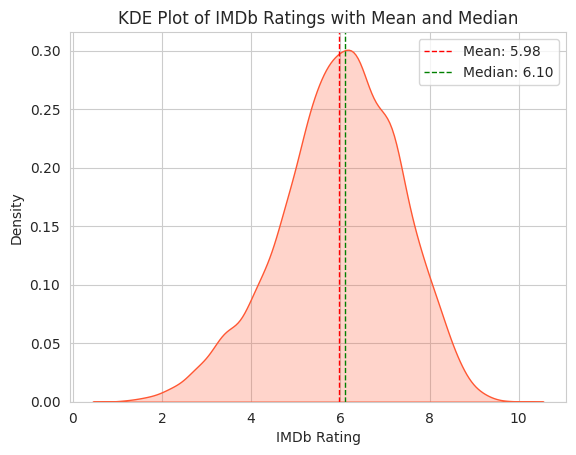

In [16]:
clean_imdb = merged_df['imdb_score'].dropna()

median = clean_imdb.median()
mean = clean_imdb.mean()

sns.kdeplot(clean_imdb, fill=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')
plt.xlabel('IMDb Rating')
plt.ylabel('Density')
plt.title('KDE Plot of IMDb Ratings with Mean and Median')
plt.legend()
plt.show()

In [17]:
merged_df['imdb_score'].fillna(merged_df['imdb_score'].median(), inplace = True)

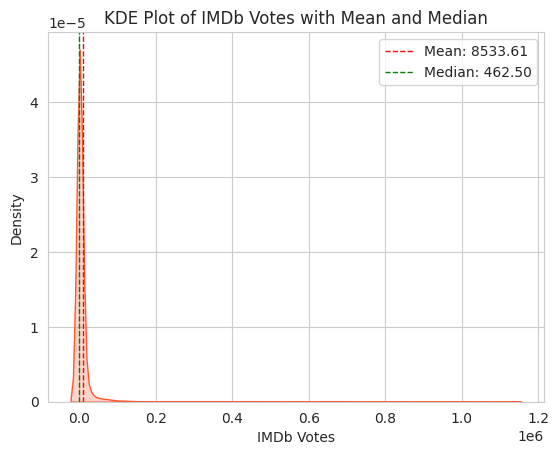

In [18]:
clean_imdb_votes = merged_df['imdb_votes'].dropna()

median = clean_imdb_votes.median()
mean = clean_imdb_votes.mean()

sns.kdeplot(clean_imdb_votes, fill=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')
plt.xlabel('IMDb Votes')
plt.ylabel('Density')
plt.title('KDE Plot of IMDb Votes with Mean and Median')
plt.legend()
plt.show()

In [19]:
merged_df['imdb_votes'].fillna(merged_df['imdb_votes'].median(), inplace = True)

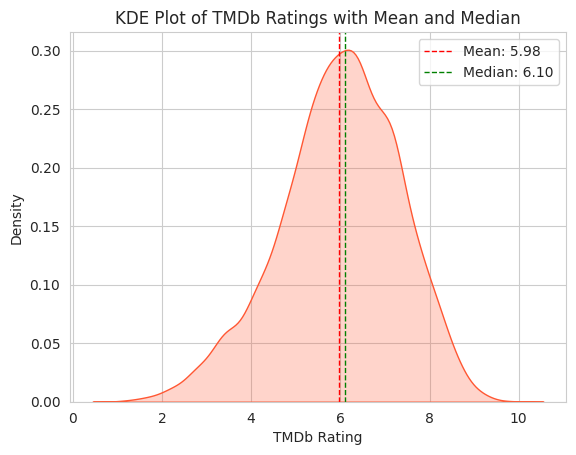

In [20]:
clean_tmdb = merged_df['tmdb_score'].dropna()

median = clean_imdb.median()
mean = clean_imdb.mean()

sns.kdeplot(clean_imdb, fill=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')
plt.xlabel('TMDb Rating')
plt.ylabel('Density')
plt.title('KDE Plot of TMDb Ratings with Mean and Median')
plt.legend()
plt.show()

In [21]:
merged_df['tmdb_score'].fillna(merged_df['tmdb_score'].median(), inplace = True)

In [22]:
merged_df['tmdb_popularity'].fillna(merged_df['tmdb_popularity'].median(), inplace = True)

In [23]:
merged_df.drop(['imdb_id', 'id', 'description'], axis = 1, inplace = True)

In [24]:
merged_df.isnull().sum()

,0
title,0
type,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,0
imdb_score,0
imdb_votes,0


In [25]:
merged_df.drop_duplicates(inplace = True)

In [26]:
print(f'The Data Contains {merged_df.duplicated().sum()} Duplicated Values')

The Data Contains 0 Duplicated Values


In [27]:
print(f'The Data Contains {merged_df.shape[0]} Rows and {merged_df.shape[1]} Columns')

The Data Contains 9868 Rows and 14 Columns


In [28]:
merged_df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name,role
0,The Three Stooges,SHOW,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26,8.6,1092.0,15.424,7.6,"Joe Besser, Moe Howard, Larry Fine",ACTOR
1,The General,MOVIE,1926,Unrated,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0,8.2,89766.0,8.647,8.0,"Buster Keaton, Marion Mack, Glen Cavender, Jim...","ACTOR, DIRECTOR"
2,The Best Years of Our Lives,MOVIE,1946,Unrated,171,"['romance', 'war', 'drama']",['US'],0,8.1,63026.0,8.435,7.8,"Myrna Loy, Fredric March, Dana Andrews, Teresa...","ACTOR, DIRECTOR"
3,His Girl Friday,MOVIE,1940,Unrated,92,"['comedy', 'drama', 'romance']",['US'],0,7.8,57835.0,11.270,7.4,"Cary Grant, Rosalind Russell, Ralph Bellamy, G...","ACTOR, DIRECTOR"
4,In a Lonely Place,MOVIE,1950,Unrated,94,"['thriller', 'drama', 'romance']",['US'],0,7.9,30924.0,8.273,7.6,"Humphrey Bogart, Gloria Grahame, Frank Lovejoy...","ACTOR, DIRECTOR"


**Observation:**
- For Duplicate Values:
    - Duplicate rows were identified and removed to ensure data integrity.
    - This eliminated redundant information, reducing the dataset size while
      maintaining unique records.
    - Ensured that each entry corresponds to a unique entity, preventing biases
      caused by repeated data points.

- Handling Missing Values:
    - For Integer Columns:
        - Missing values in numeric columns were imputed using the median.
        - I used median because It is robust against outliers and provides a
          more accurate central tendency compared to the mean.
        - This ensures that numerical data remains representative without being
          skewed by extreme values.

    - For Categorical Columns:
        - In the "age certification" column, missing values were replaced with
          "Unrated", indicating that the classification is unavailable.
        - In the "name" column, missing values were filled with       "Unavailable" ensuring no blanks remain while still highlighting missing information.

In [29]:
merged_df['production_countries'].unique()

array(["['US']", "['GB']", "['MX', 'US']", "['GB', 'CA']", "['DE', 'US']",
       "['SU']", '[]', "['IN']", "['CA', 'US']", "['MX']", "['XX']",
       "['US', 'IT']", "['JP']", "['IT', 'FR']", "['HK']",
       "['FR', 'DE', 'IT']", "['ES', 'IT']", "['GB', 'US']",
       "['IL', 'US']", "['US', 'FR', 'IT']", "['IT']",
       "['IT', 'GB', 'US']", "['GB', 'US', 'IT', 'MX', 'ES']",
       "['AU', 'US']", "['CH', 'GB']", "['CA', 'FR']", "['US', 'IE']",
       "['GB', 'IT']", "['IT', 'US']", "['FR']", "['GR', 'US']", "['DE']",
       "['HK', 'US', 'CN']", "['US', 'ES']", "['PH', 'US']",
       "['NL', 'US']", "['FR', 'US']", "['IT', 'YU']",
       "['FR', 'DE', 'CH', 'CI']", "['PR', 'US']", "['US', 'PH']",
       "['YU', 'US']", "['IT', 'MX']", "['IT', 'ES', 'DE', 'LI']",
       "['US', 'CA']", "['US', 'GB']", "['US', 'DE']",
       "['US', 'IT', 'FR']", "['CA']", "['FR', 'GB']", "['JP', 'KR']",
       "['GR']", "['ES']", "['US', 'JP']", "['SU', 'US']", "['FR', 'DE']",
       "['FR', 'IT']"

In [30]:
import ast

def process_production_countries(df, column_name='production_countries'):


    def safe_eval(x):
        try:
            return ast.literal_eval(x) if isinstance(x, str) else x
        except (ValueError, SyntaxError):
            return []  # Return an empty list for invalid strings

    df[column_name] = df[column_name].apply(safe_eval)

    # Explode the list into multiple rows
    df_exploded = df.explode(column_name)
    df_exploded.rename(columns={column_name: 'country'}, inplace=True)

    df_exploded['country'].fillna('UNKOWN', inplace = True)

    return df_exploded

In [31]:
processed_df = process_production_countries(merged_df.copy()) # created a copy oo the original data

print(processed_df.head(20)) # result.

# To get a list of unique countries:

unique_countries = processed_df['country'].unique()
print("\nUnique Countries:", unique_countries)

#To get the count of each country.
country_counts = processed_df['country'].value_counts()
print("\nCountry Counts:\n", country_counts)



                                               title   type  release_year  \
0                                  The Three Stooges   SHOW          1934   
1                                        The General  MOVIE          1926   
2                        The Best Years of Our Lives  MOVIE          1946   
3                                    His Girl Friday  MOVIE          1940   
4                                  In a Lonely Place  MOVIE          1950   
5                                         Stagecoach  MOVIE          1939   
6                              It's a Wonderful Life  MOVIE          1946   
7                                             Detour  MOVIE          1945   
8                                     My Man Godfrey  MOVIE          1936   
9                                          Marihuana  MOVIE          1936   
10  Intolerance: Love's Struggle Throughout the Ages  MOVIE          1916   
11                                      The Stranger  MOVIE          1946   

In [32]:
processed_df['country'] = processed_df['country'].replace({'United States of America' : 'US'})

In [33]:
processed_df['genres'].unique()

array(["['comedy', 'family', 'animation', 'action', 'fantasy', 'horror']",
       "['action', 'drama', 'war', 'western', 'comedy', 'european']",
       "['romance', 'war', 'drama']", ...,
       "['drama', 'family', 'thriller']",
       "['thriller', 'western', 'comedy']",
       "['comedy', 'action', 'family']"], dtype=object)

In [34]:
processed_df.shape

(11069, 14)

In [35]:
processed_df['genres'].unique()

array(["['comedy', 'family', 'animation', 'action', 'fantasy', 'horror']",
       "['action', 'drama', 'war', 'western', 'comedy', 'european']",
       "['romance', 'war', 'drama']", ...,
       "['drama', 'family', 'thriller']",
       "['thriller', 'western', 'comedy']",
       "['comedy', 'action', 'family']"], dtype=object)

In [36]:
processed_df.isna().sum()

,0
title,0
type,0
release_year,0
age_certification,0
runtime,0
genres,0
country,0
seasons,0
imdb_score,0
imdb_votes,0


In [37]:
processed_df.shape

(11069, 14)

In [38]:
pd.crosstab(processed_df['type'], processed_df['country'])

country,AE,AF,AL,AM,AN,AQ,AR,AT,AU,BA,...,UNKOWN,US,UY,VE,VN,XC,XK,XX,YU,ZA
type,,,,,,,,,,,,,,,,,,,,,
MOVIE,8,7,2,1,1,1,17,12,111,2,...,667,4861,3,8,6,2,3,115,8,28
SHOW,0,0,0,0,0,0,6,1,62,0,...,154,472,1,0,0,0,0,5,0,2


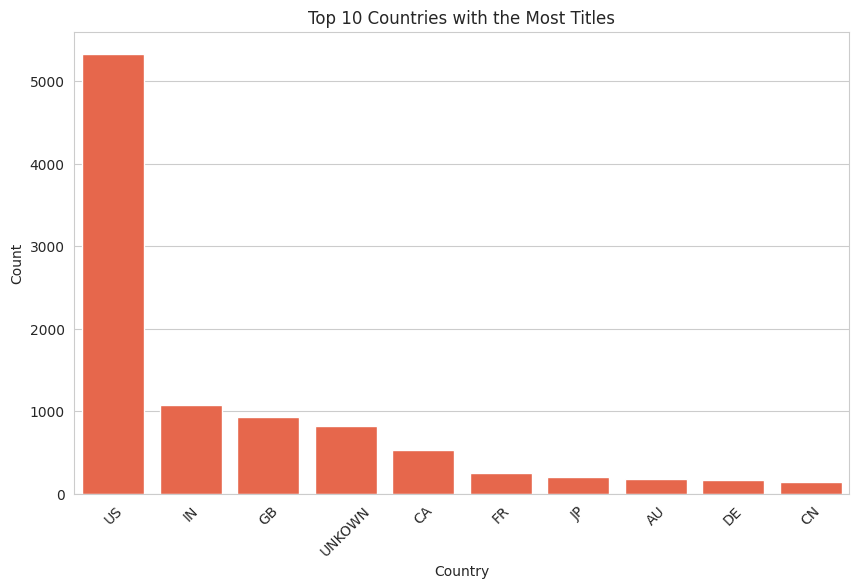

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

sns.barplot(x = processed_df['country'].value_counts().head(10).index, y = processed_df['country'].value_counts().head(10).values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries with the Most Titles')
plt.xticks(rotation=45)
plt.show()


**Chart:** This chart visualizes the distribution of titles across different countries, focusing on the top 10 countries with the highest number of titles in the dataset

**Insights:** We can see that most of the Movies and Shows Produced in the US and then IN

In [40]:
processed_df['release_year'].unique()

array([1934, 1926, 1946, 1940, 1950, 1939, 1945, 1936, 1916, 1925, 1938,
       1932, 1944, 1928, 1941, 1937, 1942, 1924, 1947, 1943, 1931, 1933,
       1923, 1949, 1948, 1919, 1920, 1921, 1922, 1927, 1935, 1915, 1918,
       1929, 1914, 1930, 1912, 1917, 1974, 1951, 1976, 1980, 1968, 1975,
       1960, 1971, 1978, 1979, 1977, 1973, 1955, 1972, 1963, 1965, 1957,
       1952, 1966, 1953, 1961, 1962, 1964, 1958, 1970, 1969, 1959, 1956,
       1954, 1967, 1989, 1984, 1988, 1981, 1986, 1983, 1990, 1987, 1985,
       1982, 1992, 1999, 2000, 1997, 1993, 1996, 1995, 1998, 1994, 1991,
       2004, 2010, 2005, 2001, 2006, 2009, 2008, 2002, 2003, 2007, 2012,
       2011, 2013, 2014, 2015, 2016, 2018, 2017, 2020, 2019, 2022, 2021])

In [41]:
processed_df['release_decade'] = (processed_df['release_year'] // 10) * 10

In [42]:
genre_counts = processed_df['genres'].value_counts()

In [43]:
top_n = 5  # Top 5 genres
top_genres = genre_counts.nlargest(5)

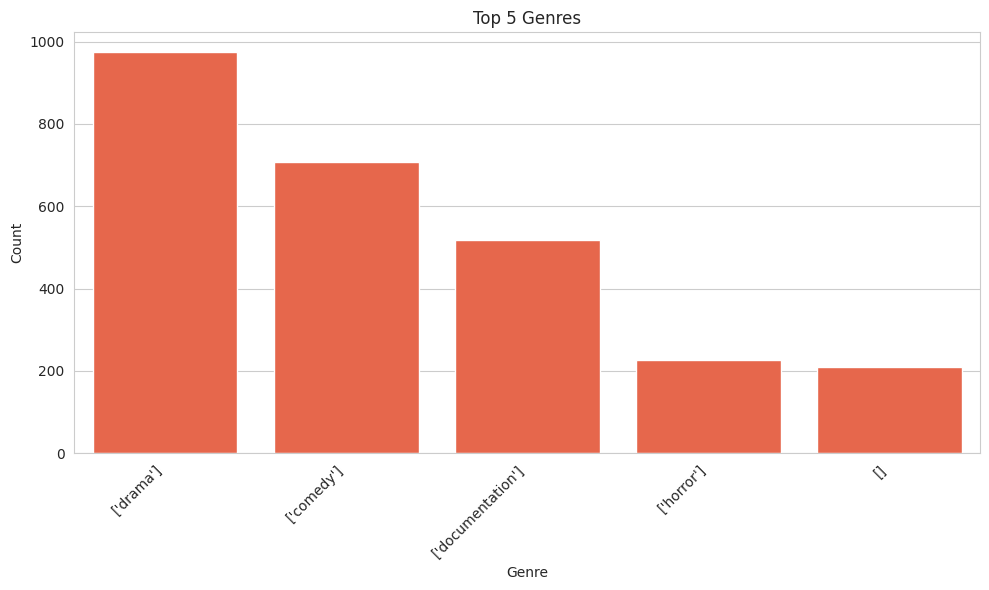

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

**Chart:** This bar chart visualizes the Top 5 Most Popular Genres in the dataset. It helps understand the distribution of genres and which types of content dominate.

**Insights:** It seems that Drama content is popular it suggests growing viewer interest in that content followed to the Comedy Genre

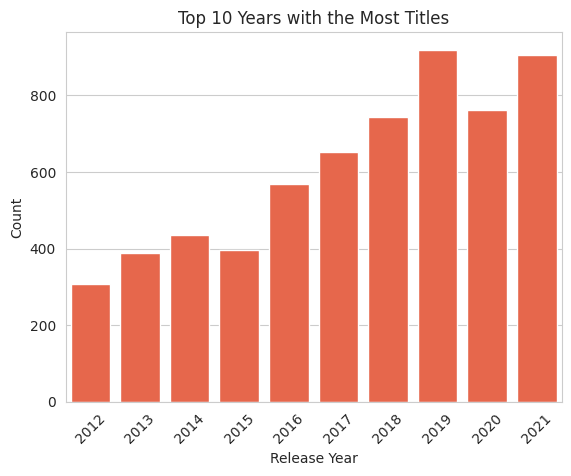

In [45]:
sns.barplot(x=processed_df['release_year'].value_counts().head(10).index, y=processed_df['release_year'].value_counts().head(10).values)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Top 10 Years with the Most Titles')
plt.xticks(rotation=45)
plt.show()

**Chart:** This bar chart visualizes the Top 10 Years with the Most Titles Released. It helps understand which years had the highest content production and how the industry trends have changed over time.

**Insights:** Most of the movies and shows are released in the year 2019 and 2021 but we can see the Drop in the year 2020 because of the **COVID-19**

In [46]:
processed_df['type'].unique()

array(['SHOW', 'MOVIE'], dtype=object)

In [47]:
tv_shows = processed_df[processed_df['type'] == 'SHOW'].copy()

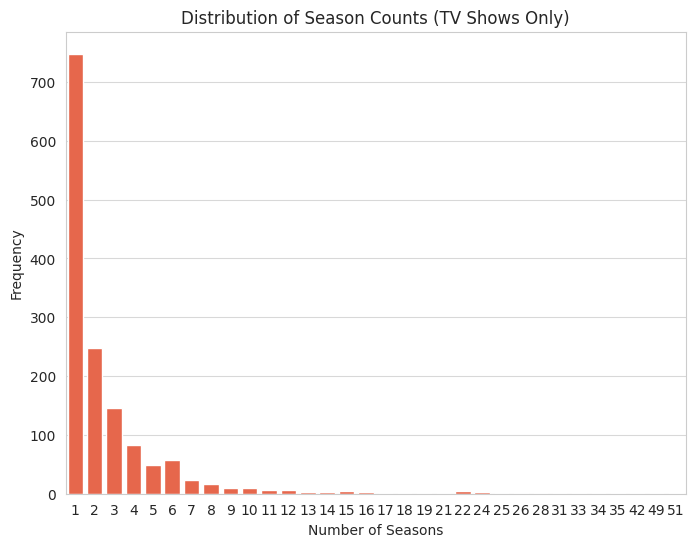

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='seasons', data=tv_shows, order=sorted(tv_shows['seasons'].unique()))
plt.title('Distribution of Season Counts (TV Shows Only)')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Chart:** This count plot visualizes the distribution of TV shows based on the number of seasons. It helps in understanding how TV series are structured in terms of longevity—whether most shows have fewer or more seasons.

**Insights:** Most of the Series have only One Season and there are fewer series are there more than 20 seasons and Modern streaming services (Netflix, Prime, etc.) often produce shorter, binge-worthy series with fewer seasons.

In [49]:
top_5_genres = processed_df['genres'].value_counts().head(5).index

In [50]:
filtered_df = processed_df[processed_df['genres'].isin(top_5_genres)]

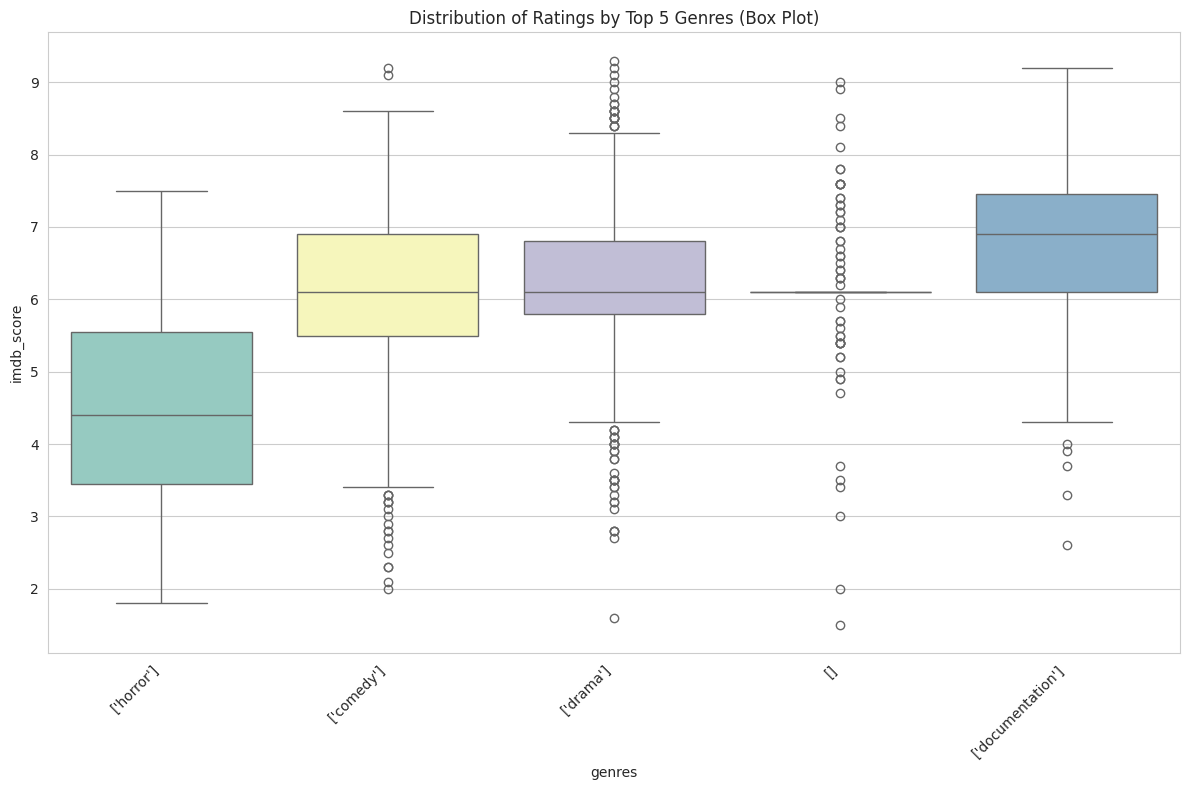

In [51]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='imdb_score', data=filtered_df, palette='Set3')
plt.title('Distribution of Ratings by Top 5 Genres (Box Plot)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Chart:** This box plot visualizes the distribution of IMDb ratings across the top 5 genres. It helps in understanding how ratings vary for different genres and whether certain genres tend to receive higher or lower ratings consistently.

**Insights:** The central line in each box represents the median rating for that genre. A taller box means high variability (Horror genre got high IMDb ratings).

In [52]:
release_counts = processed_df.groupby(['release_decade', 'type']).size().unstack(fill_value=0)
release_counts

type,MOVIE,SHOW
release_decade,,
1910,20,0
1920,65,0
1930,415,1
1940,423,0
1950,259,11
1960,276,11
1970,395,13
1980,424,41
1990,583,71


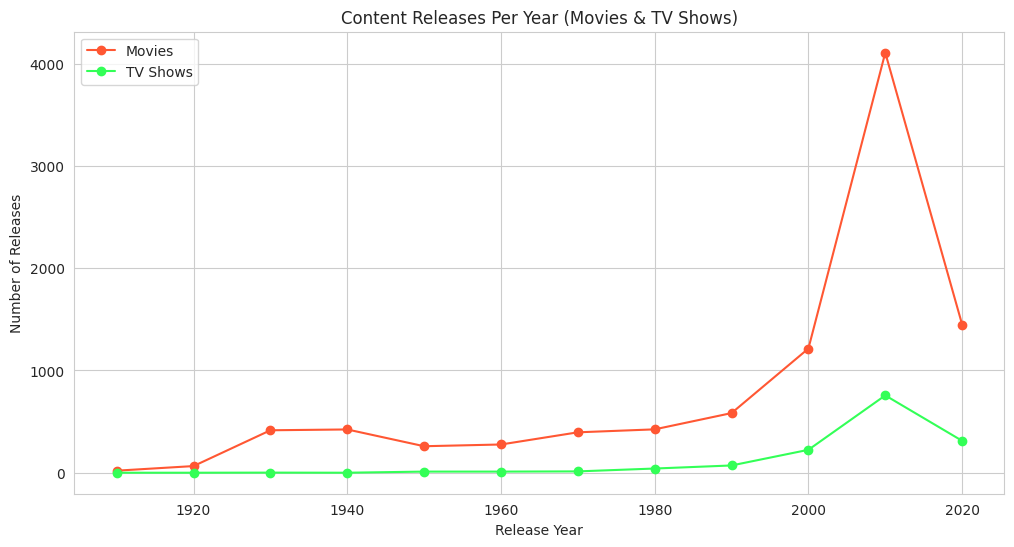

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(release_counts.index, release_counts['MOVIE'], label='Movies', marker='o')
plt.plot(release_counts.index, release_counts['SHOW'], label='TV Shows', marker='o')
plt.title('Content Releases Per Year (Movies & TV Shows)')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.show()

**Chart:** This line plot visualizes the number of movies and TV shows released per year. It helps track trends over time, showing whether the production of content has increased or decreased over the years.

**Insights:** As we can see that from the year 1960 the movies were producing more than the previous years. In 2010 produced more than 4000 novies and in 2020 it declined because of COVID-19

From 1980 the production house started Tv Shows. In 2010 the Demand of the Tv Shows Increased and it dropped in 2020 because of COVID-19

In [54]:
top_n = 5  # Top 5 Countries
top_countries = filtered_df['country'].value_counts().nlargest(top_n).index

In [55]:
filtered_df['country_reduced'] = filtered_df['country'].apply(lambda x: x if x in top_countries else 'Other')

In [56]:
genre_counts_filtered = filtered_df.groupby(['country_reduced', 'genres']).size().unstack(fill_value=0)

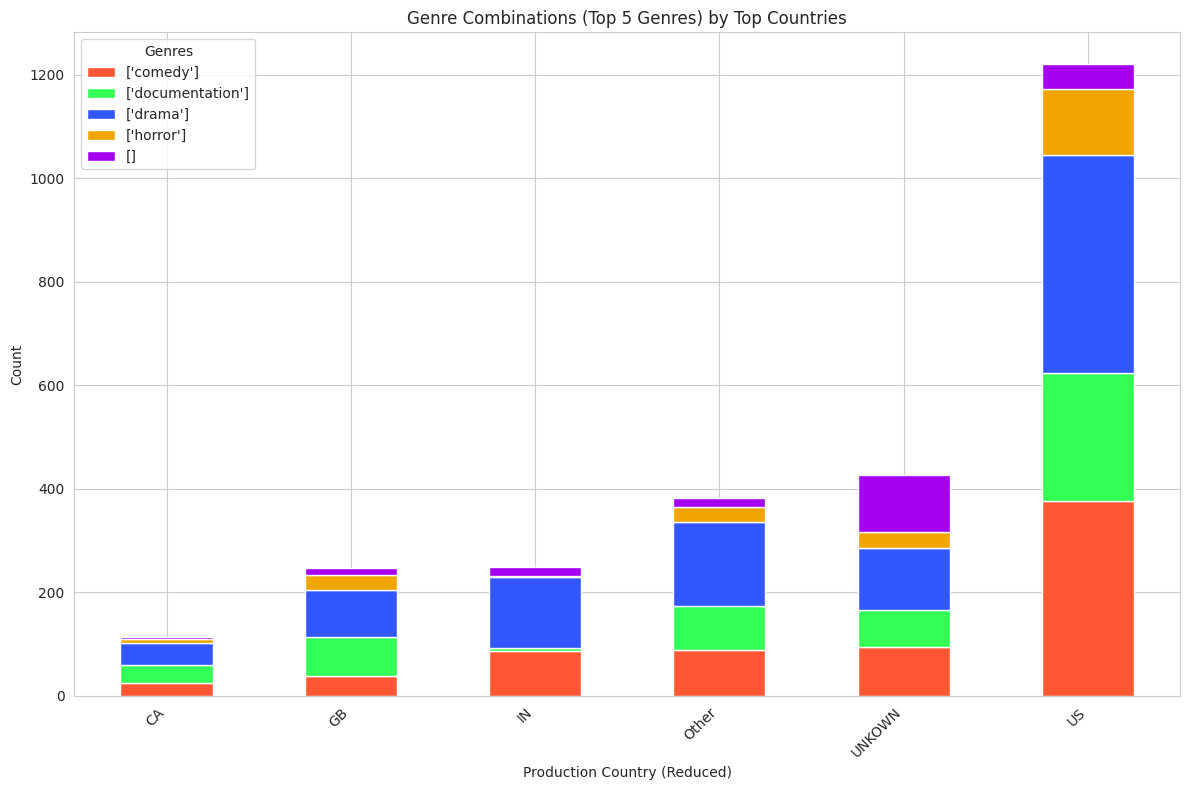

In [57]:
genre_counts_filtered.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title(f'Genre Combinations (Top 5 Genres) by Top Countries')
plt.xlabel('Production Country (Reduced)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genres')
plt.tight_layout()
plt.show()

**Chart:** This stacked bar chart visualizes the distribution of the top 5 genres across different countries

**Insights:** In all countries has a lot of "Drama", it means Audience prefers that genre and then "Comedy" genre.

In [58]:
value_count = processed_df['type'].value_counts()
value_count

,count
type,
MOVIE,9629
SHOW,1440


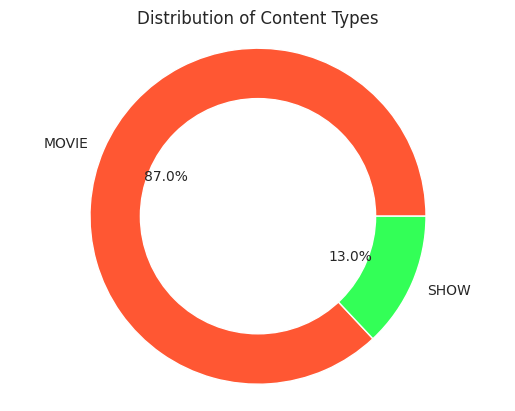

In [59]:
plt.pie(value_count, labels=value_count.index, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Content Types')
plt.axis('equal') #Ensures that the donut chart is drawn as a circle.
plt.show()

**Chart:** This donut chart is used to visualize the distribution of content types

**Insights:** Movies takes up 87%, it means that category dominates to the  Tv Show.

In [60]:
crosstab_data = pd.crosstab(processed_df['type'], processed_df['age_certification'])
crosstab_data

age_certification,G,NC-17,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,Unrated
type,,,,,,,,,,,,
MOVIE,302,15,666,752,1616,0,0,0,0,0,0,6278
SHOW,0,0,0,0,0,194,65,222,98,98,73,690


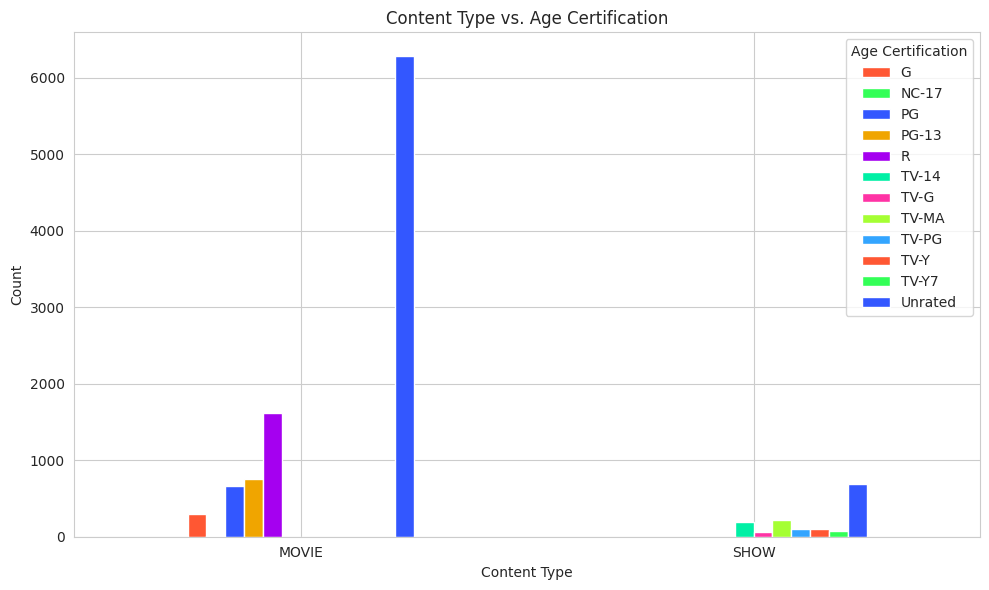

In [61]:
crosstab_data.plot(kind='bar', figsize=(10, 6))
plt.title('Content Type vs. Age Certification')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Age Certification')
plt.tight_layout()
plt.show()

**Chart:** This grouped bar chart visualizes the relationship between content type (Movies vs. TV Shows) and age certification (ratings like PG, R, etc.).

**Insights:**
- Most of the Movies and Tv Shows are Unrated.
- R-Rated Content Movies are more, it suggests movies lean toward mature audiences.
- After R-Rated Content Movies, PG-13 Content Movies are more, it suggests audience like to watch Teen Movies.
- Lastly PG and G (Family Friendly) Movies are lesser compare to the Mature Content Movies.

- TV-MA and TV-Y7 Content Shows are more than Other Contents, it suggests Shows are lean towards mature and family friendly audiences.
- TV-G, TV-PG, G and TV-14 Contents Shows are lesser than the TV-MA and TV-Y7, it means the Shows are towards Family Friendly audiences.


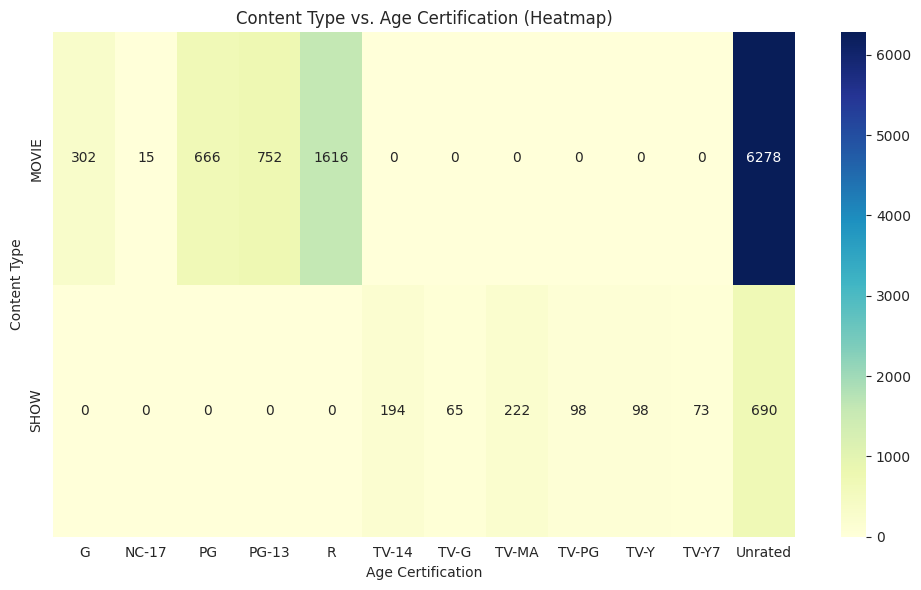

In [62]:
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Content Type vs. Age Certification (Heatmap)')
plt.xlabel('Age Certification')
plt.ylabel('Content Type')
plt.tight_layout()
plt.show()

**Chart:** This heatmap visualizes the relationship between content type (Movies vs. TV Shows) and age certification. A heatmap provides a clear numerical comparison with color intensity representing frequency.

**Insights:**
- Most of the Contents are Unrated in Movies and Tv Shows.
- R and PG-13 has high values in Movies, it suggests that Movies cater more to Mature audiences.
- G and PG has low values compare to the R and PG-13, it suggests that Movies cater to the Younger Audience.
- NC-17 is least and it suggests to the Adult Audiences.
- TV-MA and TV-14 has high Values in Tv Shows, it suggests that Tv Shows more to Mature Audiences.
- TV-PG, TV-Y, TV-Y7 has low values compare to the TV-MA and TV-14, it suggests that Tv Shows for the Younger Audiences.

In [63]:
top_5_genres = processed_df['genres'].value_counts().nlargest(5).index

In [64]:
filtered_df = processed_df[processed_df['genres'].isin(top_5_genres)]

In [65]:
movies = filtered_df[filtered_df['type'] == 'MOVIE']
tv_shows = filtered_df[filtered_df['type'] == 'SHOW']

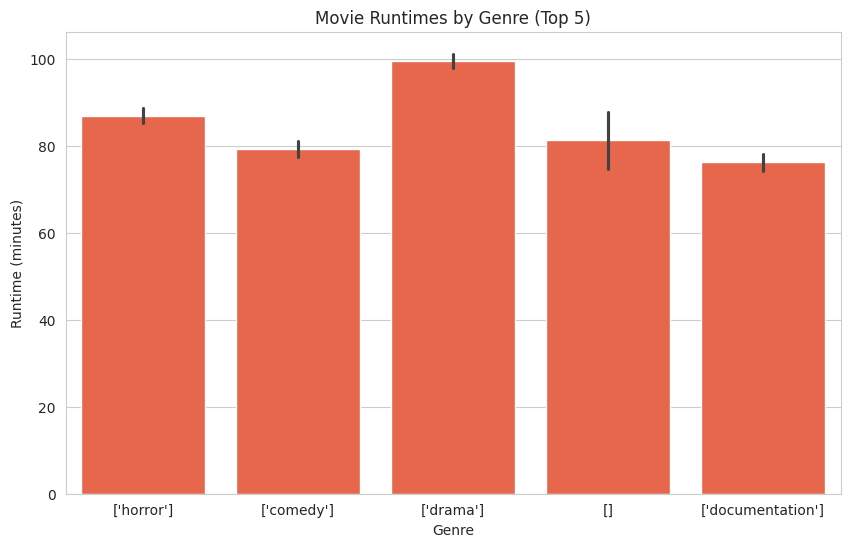

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x='genres', y='runtime', data=movies)
plt.title('Movie Runtimes by Genre (Top 5)')
plt.xlabel('Genre')
plt.ylabel('Runtime (minutes)')
plt.show()

**Chart:** This bar chart visualizes the average runtime of movies across different genres.

**Insights:** The genres Drama and Horror have the highest bars, they typically have longer runtimes.

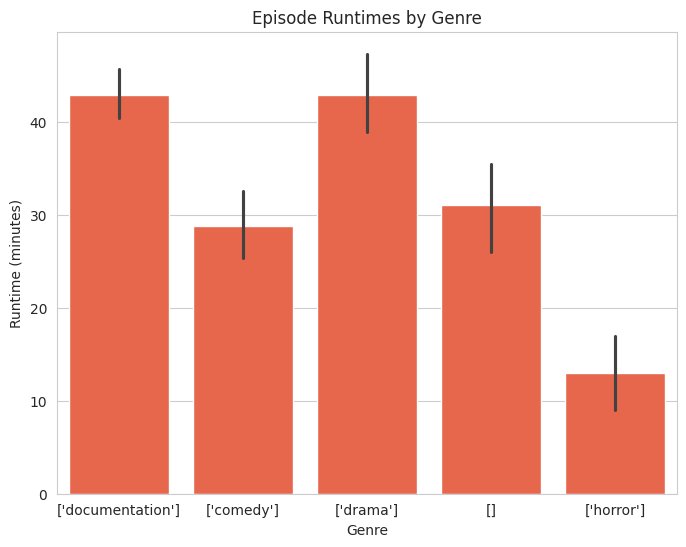

In [67]:
plt.figure(figsize=(8, 6))
sns.barplot(x='genres', y='runtime', data=tv_shows)
plt.title('Episode Runtimes by Genre')
plt.xlabel('Genre')
plt.ylabel('Runtime (minutes)')
plt.show()

**Chart:** This bar chart visualizes the average runtime of Tv Shows across different genres.

**Insights:** The genres Drama and Documentation have the highest bars, they typically have longer runtimes.

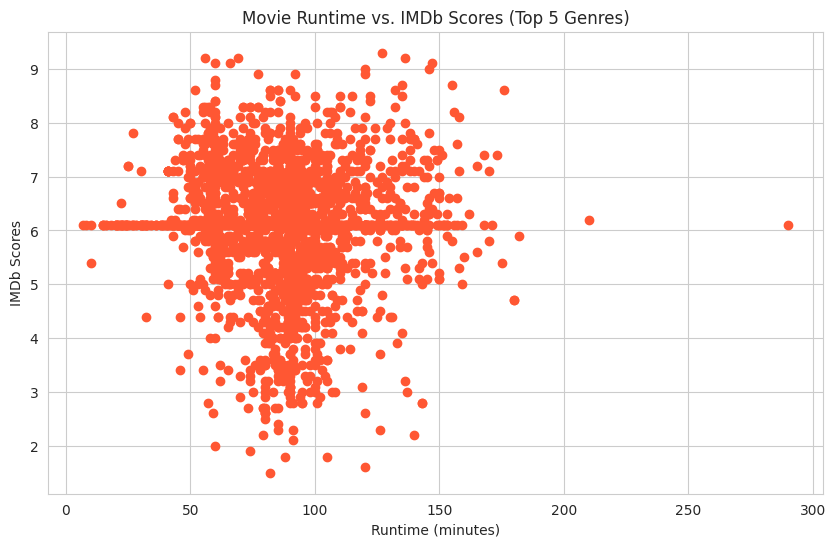

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(movies['runtime'], movies['imdb_score'])
plt.title('Movie Runtime vs. IMDb Scores (Top 5 Genres)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Scores')
plt.show()

**Chart:** This scatter plot visualizes the relationship between movie runtime and IMDb scores.

**Insights:** The points are randomly scattered, there is no strong correlation.

In [69]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = movies[['runtime']]
y = movies['imdb_score']

# Train model
model = LinearRegression()
model.fit(X, y)

# Computing R²
r_squared = model.score(X, y)
print(f"R-squared value: {r_squared:.2f}")

R-squared value: 0.00


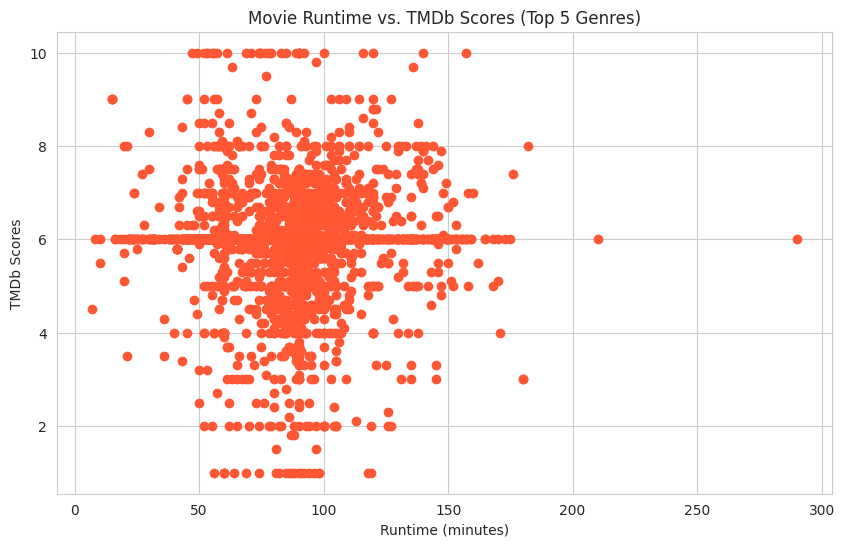

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(movies['runtime'], movies['tmdb_score'])
plt.title('Movie Runtime vs. TMDb Scores (Top 5 Genres)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('TMDb Scores')
plt.show()

**Chart:** This scatter plot visualizes the relationship between movie runtime and TMDb scores.

**Insights:** The points are randomly scattered, there is no strong correlation.

In [71]:
# Prepare data
X = movies[['runtime']]
y = movies['tmdb_score']

# Train model
model = LinearRegression()
model.fit(X, y)

# Computing R²
r_squared = model.score(X, y)
print(f"R-squared value: {r_squared:.2f}")

R-squared value: 0.00


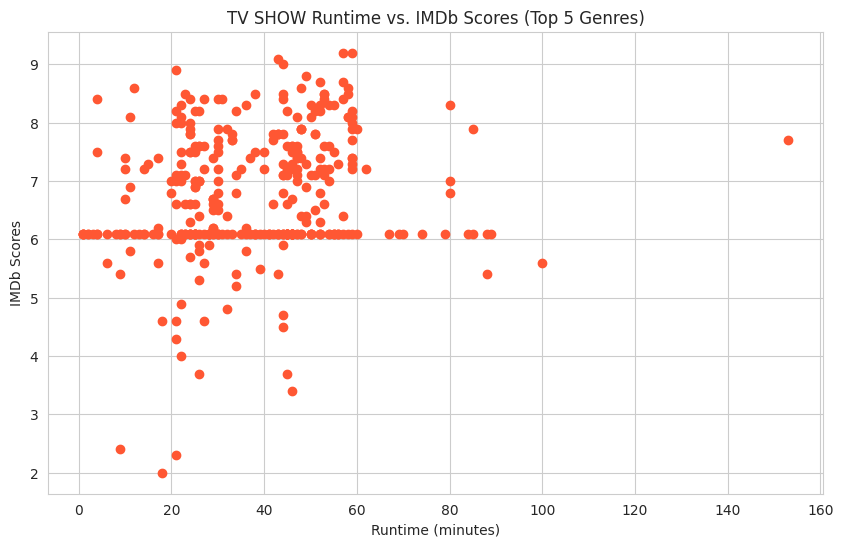

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(tv_shows['runtime'], tv_shows['imdb_score'])
plt.title('TV SHOW Runtime vs. IMDb Scores (Top 5 Genres)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Scores')
plt.show()

**Chart:** This scatter plot visualizes the relationship between tv shows runtime and IMDb scores.

**Insights:** The points are randomly scattered, there is no strong correlation.

In [73]:
# Prepare data
X = tv_shows[['runtime']]
y = tv_shows['imdb_score']

# Train model
model = LinearRegression()
model.fit(X, y)

# Computing R²
r_squared = model.score(X, y)
print(f"R-squared value: {r_squared:.2f}")

R-squared value: 0.03


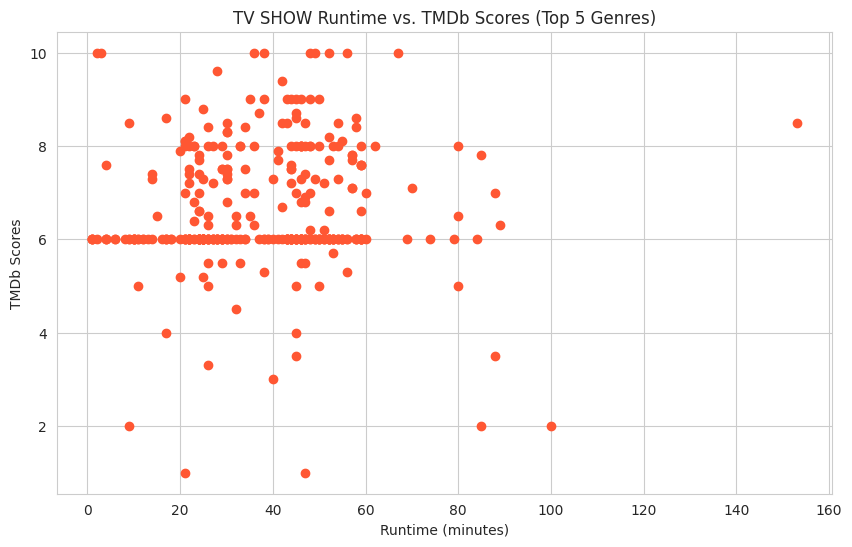

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(tv_shows['runtime'], tv_shows['tmdb_score'])
plt.title('TV SHOW Runtime vs. TMDb Scores (Top 5 Genres)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('TMDb Scores')
plt.show()

**Chart:** This scatter plot visualizes the relationship between tv shows runtime and TMDb scores.

**Insights:** The points are randomly scattered, there is no strong correlation.

In [75]:
# Prepare data
X = tv_shows[['runtime']]
y = tv_shows['imdb_score']

# Train model
model = LinearRegression()
model.fit(X, y)

# Computing R²
r_squared = model.score(X, y)
print(f"R-squared value: {r_squared:.2f}")

R-squared value: 0.03


In [76]:
filtered_actors = processed_df[processed_df['role']== 'ACTOR']
actors = filtered_actors

In [77]:
filtered_actors = actors[actors['name'] != 'Uavailable']
top_actors = filtered_actors['name'].value_counts().head(10).to_frame()

In [78]:
actor_counts = top_actors['count'].value_counts()

In [79]:
top_actors['short_name'] = top_actors.index.str.split(',').str[0]

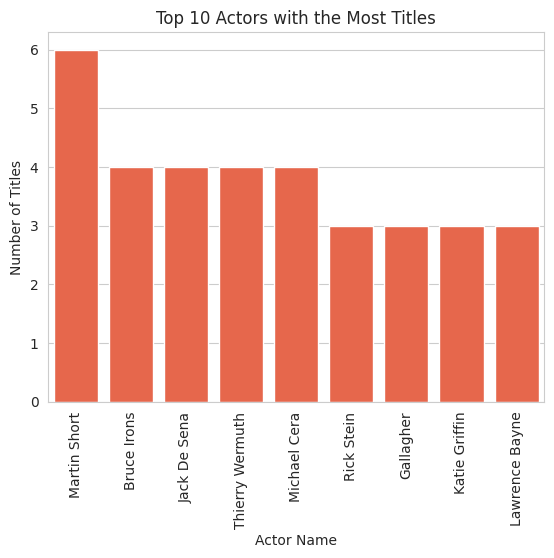

In [80]:
sns.barplot(x=top_actors['short_name'], y=top_actors['count'])
plt.title('Top 10 Actors with the Most Titles')
plt.xlabel('Actor Name')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

**Chart:** This bar chart helps visualize which actors have appeared in the most titles.

**Insights:**
- The tallest bars represent actors with the highest number of titles.
- Martin Short dominate, it suggests a few stars appear in many productions.

In [81]:
filtered_directors = processed_df[processed_df['role']== 'DIRECTOR']
directors = filtered_directors
directors

,title,type,release_year,age_certification,runtime,genres,country,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name,role,release_decade
389,The Silent Enemy,MOVIE,1930,Unrated,84,"['drama', 'romance']",CA,0,6.9,238.0,1.959,6.8,H.P. Carver,DIRECTOR,1930
389,The Silent Enemy,MOVIE,1930,Unrated,84,"['drama', 'romance']",US,0,6.9,238.0,1.959,6.8,H.P. Carver,DIRECTOR,1930
393,Target for Today,MOVIE,1944,Unrated,90,"['war', 'documentation', 'history']",US,0,7.0,55.0,0.600,6.0,William Keighley,DIRECTOR,1940
791,The Ramparts We Watch,MOVIE,1940,Unrated,99,['drama'],US,0,5.6,22.0,0.600,6.0,Louis De Rochemont,DIRECTOR,1940
1022,The Dogs of War,MOVIE,1980,R,118,"['thriller', 'action', 'drama', 'war']",GB,0,6.3,8401.0,8.729,5.6,Temujin Hijikata,DIRECTOR,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9745,"Dave Helem: DJ, the Chicago Kid",MOVIE,2021,Unrated,61,['comedy'],XX,0,6.1,17.0,0.751,6.0,Brian Volk-Weiss,DIRECTOR,2020
9751,Juanes: Origen,MOVIE,2021,Unrated,51,['documentation'],UNKOWN,0,6.2,30.0,6.727,7.5,Kacho López,DIRECTOR,2020
9792,Asmee,MOVIE,2021,Unrated,97,"['crime', 'drama', 'thriller']",IN,0,6.9,551.0,0.670,6.0,Sesh Karthikeya,DIRECTOR,2020
9815,Raunch and Roll,MOVIE,2021,Unrated,107,"['drama', 'music']",US,0,7.2,49.0,2.914,6.0,Phil Wurtzel,DIRECTOR,2020


In [82]:
filtered_directors = directors[directors['name'] != 'Uavailable']
top_directors = filtered_directors['name'].value_counts().head(10).to_frame()
top_directors.head(10)

,count
name,
Brett Harvey,4
"Frida Barkfors, Lasse Barkfors",3
Ali Kazimi,3
"Jessica McGaugh, Roma Sur",3
"Magdalena Segieda, Phelim McAleer, Ann McElhinney",3
Suzie Templeton,3
Thomas Balmès,3
Seth Breedlove,3
H.P. Carver,2


In [83]:
director_counts = top_directors['count'].value_counts()
director_counts

,count
count,
3,7
2,2
4,1


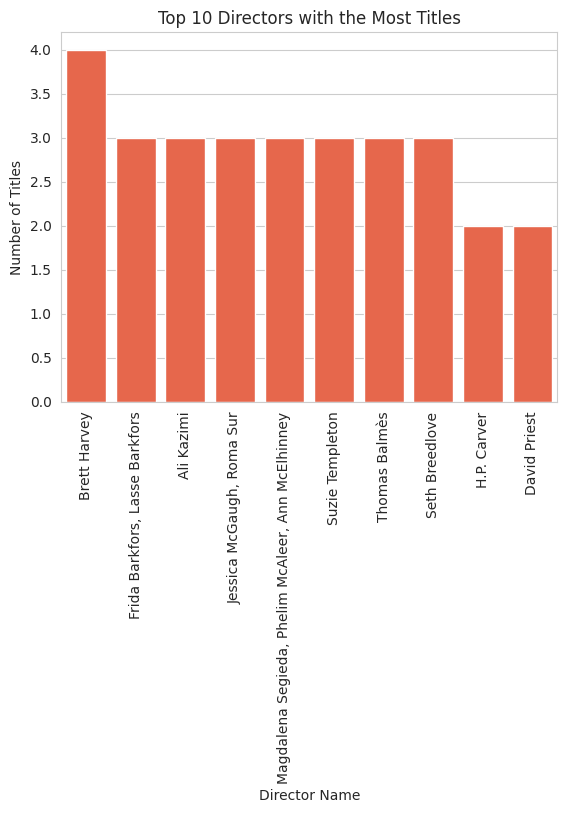

In [84]:
sns.barplot(x=top_directors.index, y=top_directors['count'])
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Director Name')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

**Chart:** This bar chart visualizes which directors have worked on the most titles.

**Insights:**
- The tallest bars represent directors with the highest number of movies and shows.
- Brett Harvey have significantly taller bars, they are far more active than others.

In [85]:
movies = merged_df[merged_df['type'] == 'MOVIE']
tv_shows = merged_df[merged_df['type'] == 'SHOW']

In [86]:
top_10_movies_imdb = movies.nlargest(10, 'imdb_score')

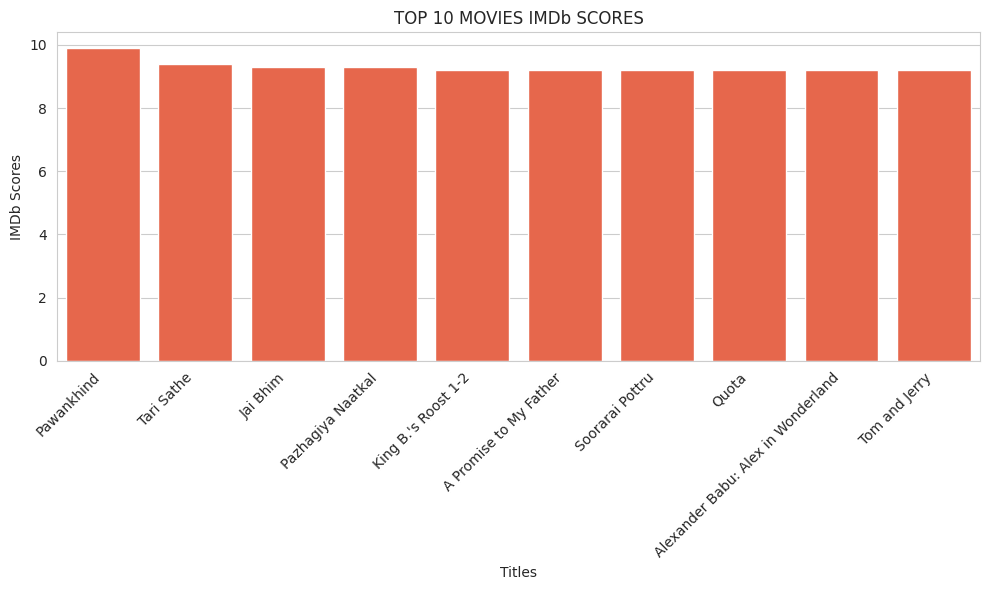

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='imdb_score', data=top_10_movies_imdb)
plt.title('TOP 10 MOVIES IMDb SCORES')
plt.xlabel('Titles')
plt.ylabel('IMDb Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Chart:** This bar chart helps visualize the IMDb ratings of the top 10 movies.

**Insights:** Pawankhind stands out significantly, it suggests a critically acclaimed masterpiece.

In [88]:
top_10_shows_imdb = tv_shows.nlargest(10, 'imdb_score')

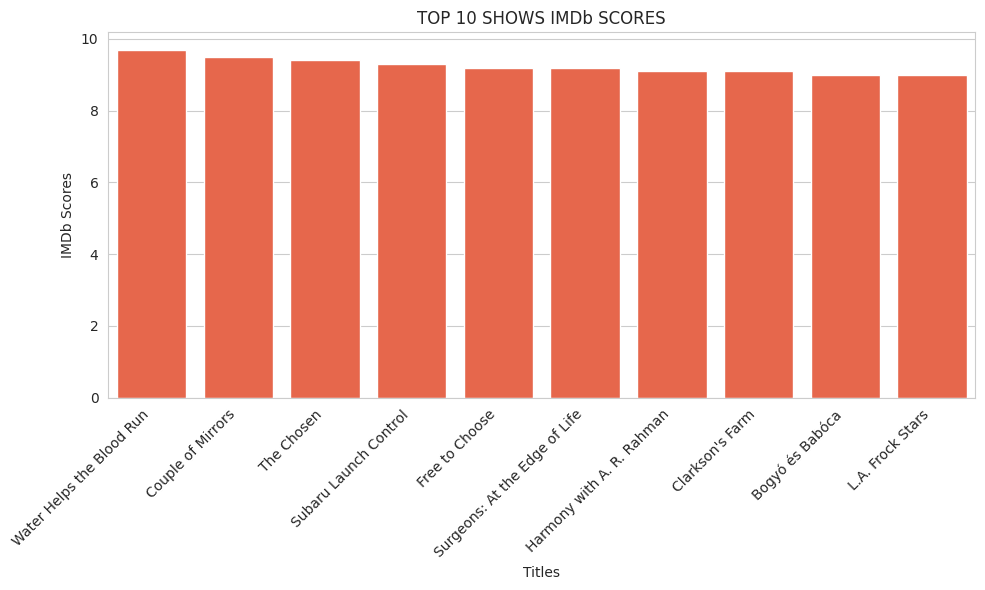

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='imdb_score', data=top_10_shows_imdb)
plt.title('TOP 10 SHOWS IMDb SCORES')
plt.xlabel('Titles')
plt.ylabel('IMDb Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Chart:** This bar chart helps visualize the IMDb ratings of the top 10 TV shows.

**Insights:** Water helps the blood run stands out significantly, it suggests a highly acclaimed series.

In [90]:
top_10_movies_tmdb = movies.nlargest(10, 'tmdb_score')

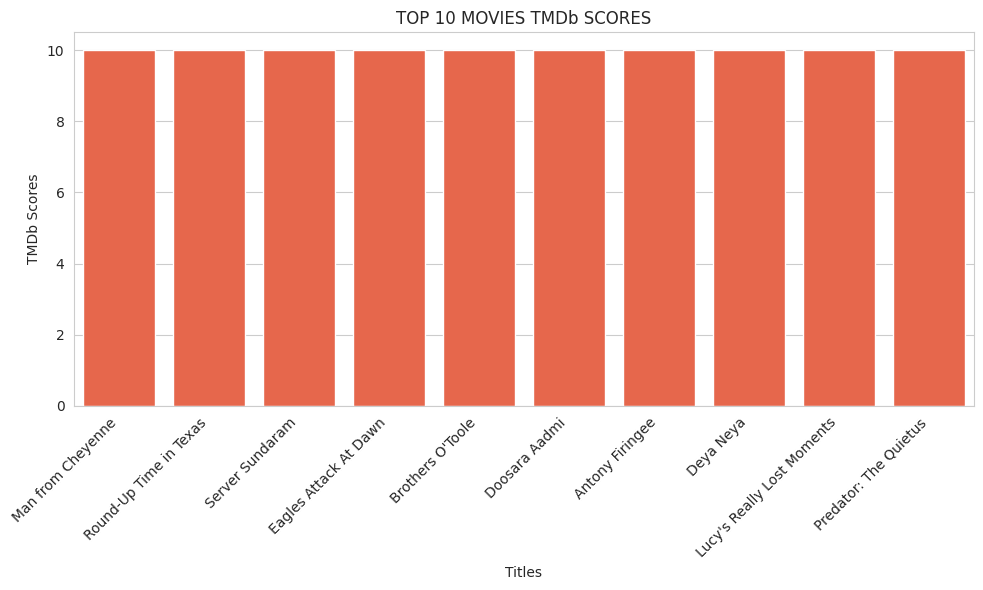

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='tmdb_score', data=top_10_movies_tmdb)
plt.title('TOP 10 MOVIES TMDb SCORES')
plt.xlabel('Titles')
plt.ylabel('TMDb Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Chart:** This bar chart visualizes the TMDb scores of the top 10 movies.


**Insights:** As we can see that all the movies scored 10 in TMDb

In [92]:
top_10_movies_tmdb

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name,role
706,Man from Cheyenne,MOVIE,1942,Unrated,60,['western'],['US'],0,6.5,87.0,1.259,10.0,"Roy Rogers, George 'Gabby' Hayes, Sally Payne,...","ACTOR, DIRECTOR"
799,Round-Up Time in Texas,MOVIE,1937,G,56,"['action', 'western', 'comedy']",['US'],0,4.7,232.0,0.880,10.0,"Gene Autry, Smiley Burnette, Maxine Doyle, Cha...","ACTOR, DIRECTOR"
1585,Server Sundaram,MOVIE,1964,Unrated,165,"['comedy', 'drama', 'romance']",['IN'],0,7.8,321.0,4.805,10.0,"Nagesh, K R Vijaya, R. Muthuraman, S. N. Laksh...","ACTOR, DIRECTOR"
1586,Eagles Attack At Dawn,MOVIE,1970,PG,90,"['action', 'drama', 'war']",['IL'],0,4.3,131.0,0.873,10.0,"Rick Jason, Peter Brown, Yosef Shiloach, Yehud...","ACTOR, DIRECTOR"
1673,Brothers O'Toole,MOVIE,1973,G,95,"['western', 'comedy']",['US'],0,4.5,170.0,1.082,10.0,"John Astin, Pat Carroll, Hans Conried, Richard...","ACTOR, DIRECTOR"
1686,Doosara Aadmi,MOVIE,1977,PG,143,"['drama', 'family', 'romance']",['IN'],0,6.3,201.0,1.788,10.0,"Rakhee Gulzar, Rishi Kapoor, Neetu Singh, Shas...","ACTOR, DIRECTOR"
1697,Antony Firingee,MOVIE,1967,Unrated,157,['drama'],['IN'],0,7.6,185.0,0.621,10.0,"Uttam Kumar, Tanuja, Asit Baran, Chhaya Devi, ...","ACTOR, DIRECTOR"
1734,Deya Neya,MOVIE,1963,Unrated,120,['drama'],['IN'],0,8.1,359.0,0.871,10.0,"Uttam Kumar, Tanuja, Sunil Bannerjee","ACTOR, DIRECTOR"
1751,Lucy's Really Lost Moments,MOVIE,1956,Unrated,71,['comedy'],['US'],0,7.3,60.0,0.600,10.0,"Desi Arnaz, Lucille Ball, Vivian Vance, Willia...","ACTOR, DIRECTOR"
2062,Predator: The Quietus,MOVIE,1988,Unrated,90,['horror'],['GB'],0,3.0,132.0,0.961,10.0,"Cordelia Roche, Cliff Twemlow, Darryl Marchant...","ACTOR, DIRECTOR"


In [93]:
top_10_shows_tmdb = tv_shows.nlargest(10, 'tmdb_score')

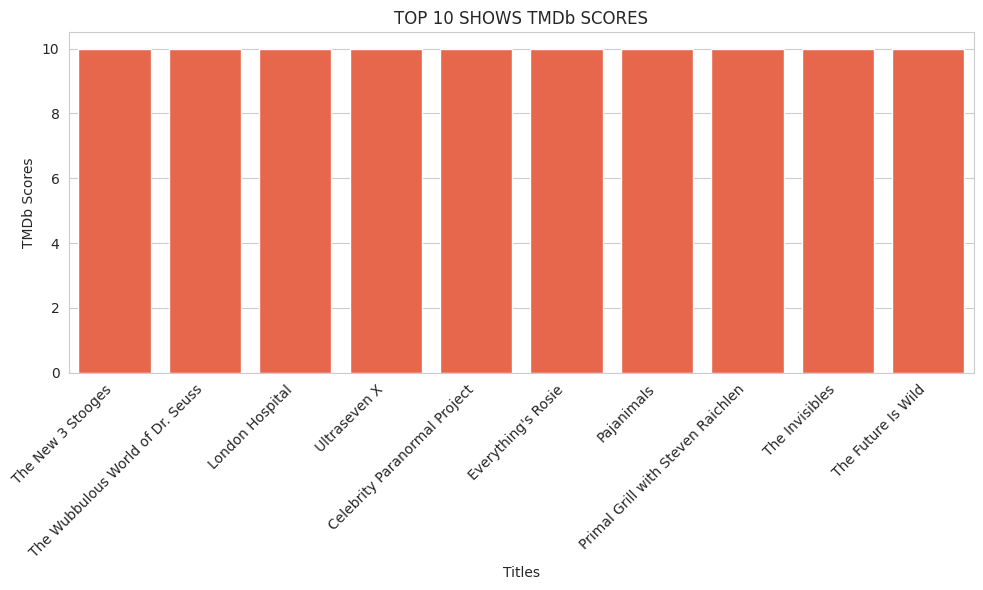

In [94]:
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='tmdb_score', data=top_10_shows_tmdb)
plt.title('TOP 10 SHOWS TMDb SCORES')
plt.xlabel('Titles')
plt.ylabel('TMDb Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Chart:** This bar chart visualizes the TMDb scores of the top 10 tv shows.


**Insights:** As we can see that all the tv shows scored 10 in TMDb

In [95]:
top_10_shows_tmdb

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name,role
1396,The New 3 Stooges,SHOW,1965,TV-PG,19,"['comedy', 'animation', 'family']",['US'],1,7.0,334.0,3.110,10.0,"Moe Howard, Larry Fine, Joe DeRita",ACTOR
2497,The Wubbulous World of Dr. Seuss,SHOW,1996,Unrated,26,"['animation', 'family']",['US'],2,6.6,173.0,4.423,10.0,"Stephanie D'Abruzzo, Kathryn Mullen, Bruce Lan...",ACTOR
3061,London Hospital,SHOW,2006,TV-14,56,['drama'],['GB'],2,6.1,462.5,0.600,10.0,NaN,NaN
3126,Ultraseven X,SHOW,2007,TV-14,24,"['action', 'drama', 'horror', 'scifi', 'thrill...",['JP'],1,7.2,72.0,0.600,10.0,"Eriku Yoza, Saki Kagami, Tomohito Wakizaki, An...","ACTOR, DIRECTOR"
3223,Celebrity Paranormal Project,SHOW,2006,Unrated,44,['reality'],['US'],1,6.1,184.0,1.297,10.0,NaN,NaN
3308,Everything's Rosie,SHOW,2010,Unrated,11,"['family', 'animation']",['GB'],4,6.7,55.0,1.198,10.0,NaN,NaN
3362,Pajanimals,SHOW,2008,TV-PG,13,['family'],['IE'],3,6.7,100.0,1.441,10.0,"Donna Kimball, Alice Dinnean, John E. Kennedy,...",ACTOR
3505,Primal Grill with Steven Raichlen,SHOW,2009,Unrated,28,['reality'],['US'],3,8.0,33.0,1.400,10.0,Steven Raichlen,ACTOR
3551,The Invisibles,SHOW,2008,Unrated,59,"['comedy', 'drama', 'scifi', 'crime']",['GB'],1,7.1,218.0,1.960,10.0,"Warren Clarke, Dean Lennox Kelly, Jenny Agutte...",ACTOR
3597,The Future Is Wild,SHOW,2007,Unrated,22,"['scifi', 'family', 'animation']","['CA', 'US']",1,7.3,99.0,1.400,10.0,"Cedric Smith, Marc Donato",ACTOR


In [96]:
top_10_movies_popularity = movies.nlargest(10, 'imdb_votes')

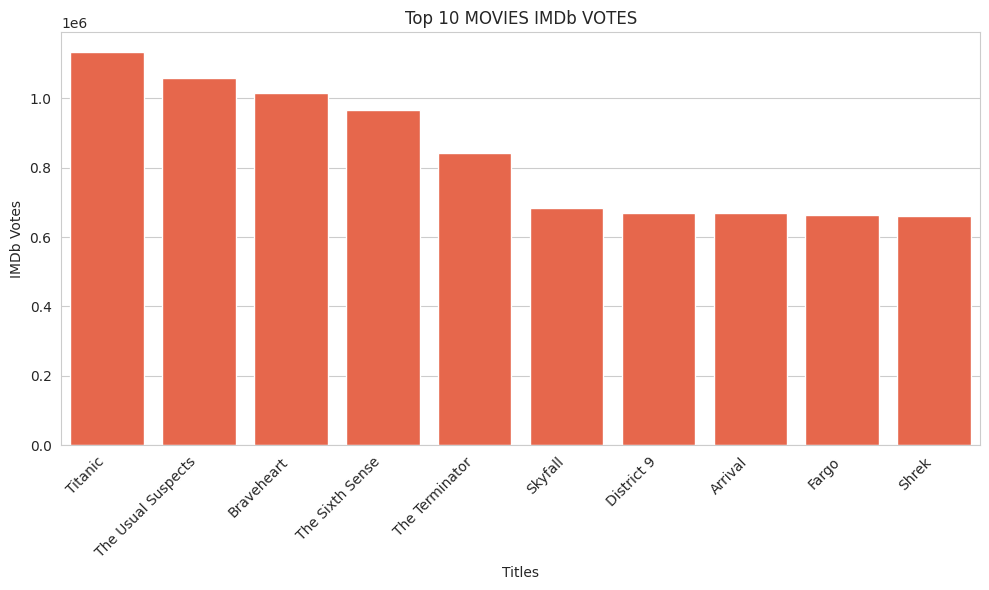

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='imdb_votes', data=top_10_movies_popularity)
plt.title('Top 10 MOVIES IMDb VOTES')
plt.xlabel('Titles')
plt.ylabel('IMDb Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Chart:** The chart visualizes the top 10 movies based on IMDb votes.

**Insights:**
- Higher IMDb votes often indicate higher audience engagement and a larger viewership.
- Titanic has a taller bar, it suggests it is more popular and widely rated than the others.

In [98]:
top_10_shows_popularity = tv_shows.nlargest(10, 'imdb_votes')

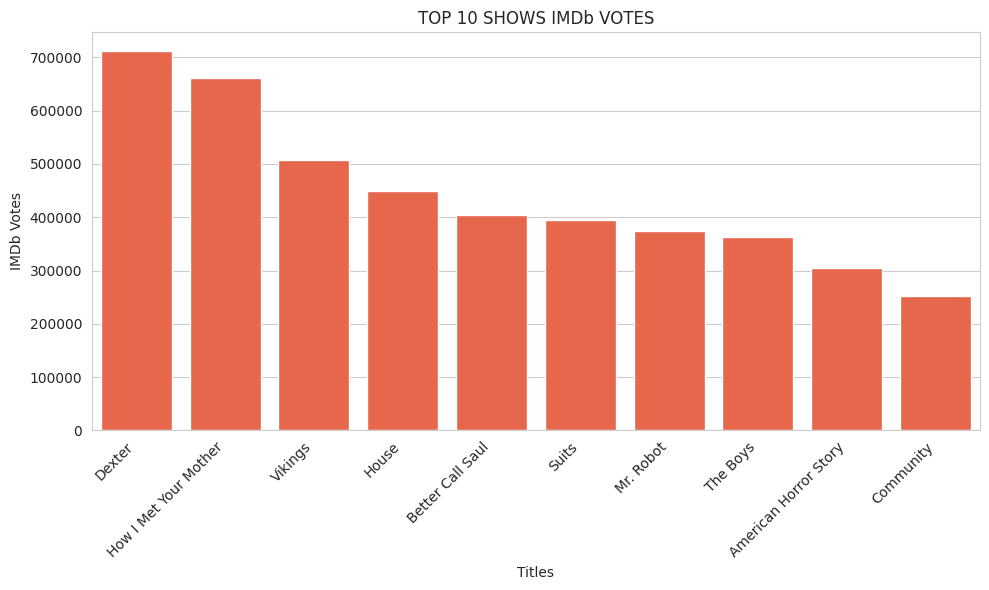

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='imdb_votes', data=top_10_shows_popularity)
plt.title('TOP 10 SHOWS IMDb VOTES')
plt.xlabel('Titles')
plt.ylabel('IMDb Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Chart:** This chart shows the top 10 TV shows based on IMDb votes, meaning it highlights the most widely rated TV shows.

**Insights:** Dexter bar is taller, it suggests that the show is far more popular and widely rated than the others.

In [100]:
top_10_movies_tmdb_popularity = movies.nlargest(10, 'tmdb_popularity')

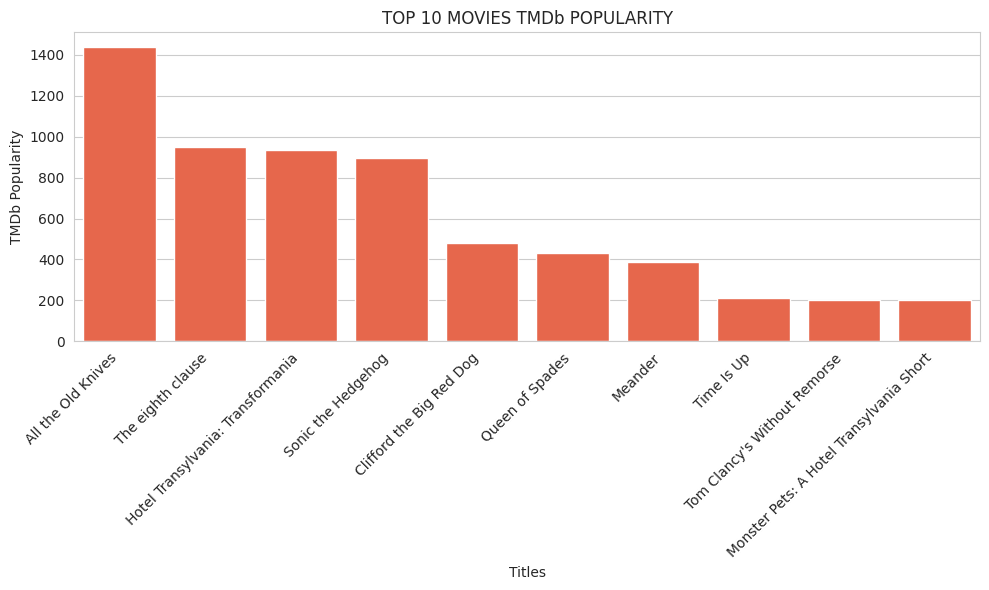

In [101]:
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='tmdb_popularity', data=top_10_movies_tmdb_popularity)
plt.title('TOP 10 MOVIES TMDb POPULARITY')
plt.xlabel('Titles')
plt.ylabel('TMDb Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Chart:** This chart visualizes the top 10 movies based on TMDb popularity scores

**Insights:** All the Old Knives movie with a taller bar has a higher popularity score, indicating more engagement and visibility on TMDb.

In [102]:
top_10_shows_tmdb_popularity = tv_shows.nlargest(10, 'tmdb_popularity')

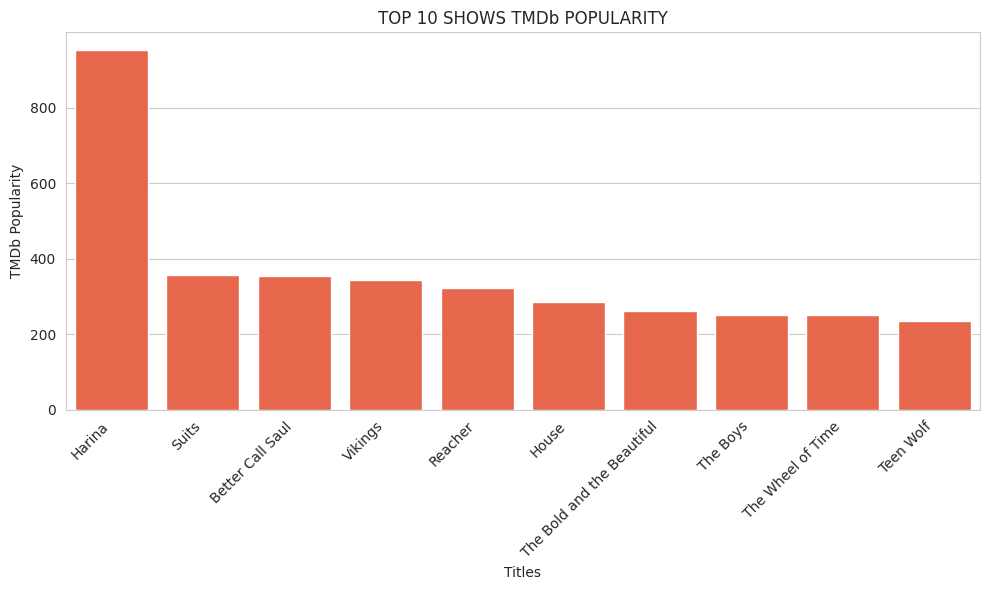

In [103]:
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='tmdb_popularity', data=top_10_shows_tmdb_popularity)
plt.title('TOP 10 SHOWS TMDb POPULARITY')
plt.xlabel('Titles')
plt.ylabel('TMDb Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Chart:**  This chart displays the top 10 TV shows based on TMDb popularity scores.

**Insights:** Harina bar is taller, it suggests that the show is far more popular and widely rated than the others.

**Conclusion:**
      This EDA provides valuable insights into Amazon Prime Video's content landscape. The platform's focus on mature content and popular genres like Drama and Comedy is evident. Regional variations highlight the platform's global strategy. Future analyses can build upon these findings to further refine content strategies and enhance user experience.